# Lab 1

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from IPython.display import display, Math

## Step 1. Choose subsample with main variables for your further analysis

In [72]:
# Import data from csv file -
# (Rocketbank's anonymized transactional dataset published as part of a Data Science competition)

path_to_file = '/opt/notebooks/owid-covid-data.csv'
source_df = pd.read_csv(path_to_file)

df = source_df[['continent', 'hospital_beds_per_thousand', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative']].copy().dropna()

In [73]:
df.head(5)

,continent,hospital_beds_per_thousand,excess_mortality_cumulative_absolute,excess_mortality_cumulative
1975,Europe,2.89,-190.8,-4.34
2006,Europe,2.89,-165.0,-2.59
2036,Europe,2.89,-95.0,-1.17
2067,Europe,2.89,23.0,0.24
2097,Europe,2.89,188.0,1.65


## Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

In [74]:
from scipy.stats import kde

def kernel_density_estimation(x, bins):
    density = kde.gaussian_kde(x)
    xgrid = np.linspace(x.min(), x.max(), 100)
    mpl.rcParams['figure.dpi'] = 100
    plt.hist(x, bins=bins, density = True)
    plt.plot(xgrid, density(xgrid), 'r-')

### Continent

In [75]:
continent = df['continent']

<AxesSubplot:>

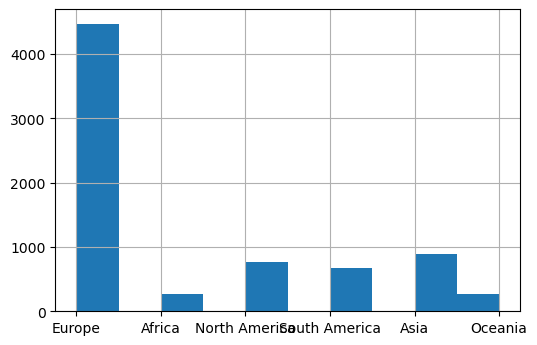

In [76]:
continent.hist()

### Hospital beds per thousand

In [77]:
beds = df['hospital_beds_per_thousand']

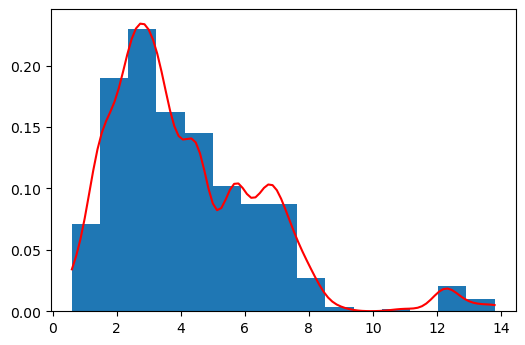

In [78]:
kernel_density_estimation(beds, 15)

### Excess mortality cumulative absolute

In [79]:
emca = df['excess_mortality_cumulative_absolute'].dropna()

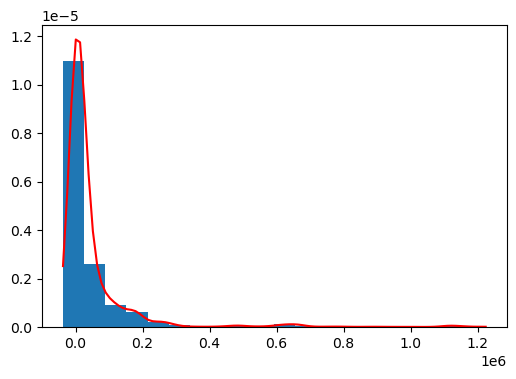

In [80]:
kernel_density_estimation(emca, 20)

### Exces mortality cumulative

In [81]:
emc = df['excess_mortality_cumulative'].dropna()
emc = (emc - emc.mean()) / emc.std()

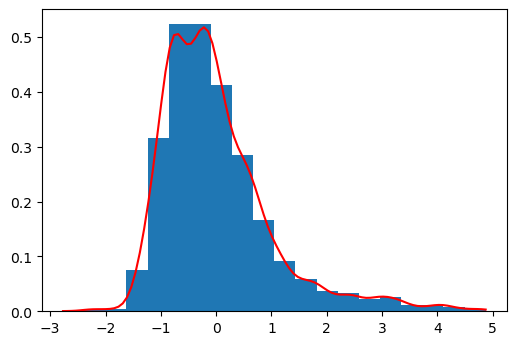

In [82]:
kernel_density_estimation(emc, 20)

## Step 3. You need to make an estimation of order statistics and represent them as "box with whiskers" plot.

In [83]:
pd.DataFrame(
    [
        ['Hospital beds per thousand (HBpT)', beds.min(), beds.max(), beds.median(), np.percentile(beds, 25), np.percentile(beds, 75)],
        ['Excess mortality cumulative absolute (EMCA)', emca.min(), emca.max(), emca.median(), np.percentile(emca, 25), np.percentile(emca, 75)],
        ['Excess mortality cumulative (EMC)', emc.min(), emc.max(), emc.median(), np.percentile(emc, 25), np.percentile(emc, 75)]
    ],
    columns=['Random Variable', 'min', 'max', 'median', 'Q1', 'Q3']
)

,Random Variable,min,max,median,Q1,Q3
0,Hospital beds per thousand (HBpT),0.600000,1.380000e+01,3.400000,2.500000,5.640000
1,Excess mortality cumulative absolute (EMCA),-37726.100000,1.224011e+06,7647.800000,61.100000,38335.900000
2,Excess mortality cumulative (EMC),-2.769131,4.872411e+00,-0.197925,-0.707606,0.422077


{'whiskers': [<matplotlib.lines.Line2D at 0xffff724fdf40>,
 'caps': [<matplotlib.lines.Line2D at 0xffff72489520>,
 'boxes': [<matplotlib.lines.Line2D at 0xffff724fdc70>,
 'medians': [<matplotlib.lines.Line2D at 0xffff72489ac0>,
 'fliers': [],
 'means': []}

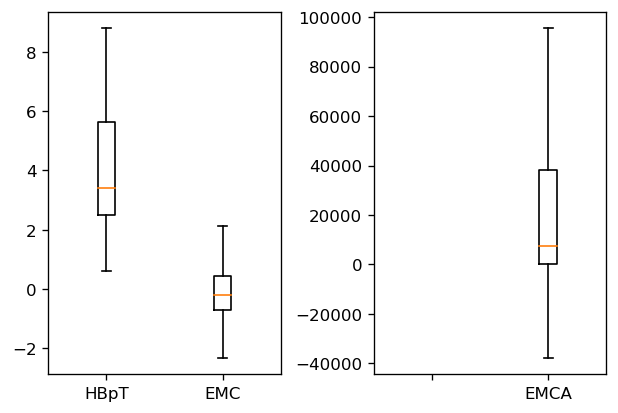

In [84]:
fig1, (ax1, ax2) = plt.subplots(1, 2, dpi=120)
plt.subplots_adjust(wspace=0.4)
ax1.boxplot(
    (beds, emc),
    labels=('HBpT', 'EMC'),
    showfliers=False
)

ax2.boxplot(
    ((), emca),
    labels=('', 'EMCA'),
    showfliers=False
)

## Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results

### Hospital beds per thousand

It seems like a **gamma distribution**:

$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$

![gamma_distribution_pdf.png](gamma_distribution_pdf.png)

### Excess mortality cumulative absolute

It seems like an **exponential distribution**:

$$x \sim \text{Exp}(\lambda) = \lambda e^{-\lambda x}$$

![exponential_distribution_pdf.png](exponential_distribution_pdf.png)

### Excess mortality cumulative

It seems like a **Normal distribution**.

## Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method

### Hospital beds per thousand

#### Maximum likelihood method

In [85]:
beds_mean, beds_var = beds.mean(), beds.var()

display(Math(r'$E(X) = {}$'.format(beds_mean)))
display(Math(r'$Var(X) = {}$'.format(beds_var)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [86]:
beds_alpha = beds_mean ** 2 / beds_var
beds_beta = beds_var / beds_mean

display(Math(r'$\alpha = {}$'.format(beds_alpha)))
display(Math(r'$\beta = {}$'.format(beds_beta)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

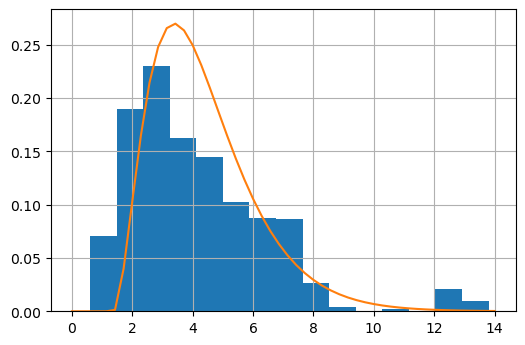

In [87]:
from scipy.stats.distributions import gamma

mpl.rcParams['figure.dpi'] = 100
beds.hist(bins=15, density=True)
plt.plot(np.linspace(0, 14), gamma.pdf(np.linspace(0, 14), beds_alpha, beds_beta))

### Excess mortality cumulative absolute

#### Maximum likelihood method

In [88]:
emca_mean, emca_var = emca.mean(), emca.var()

display(Math(r'$E(X) = {}$'.format(emca_mean)))
display(Math(r'$Var(X) = {}$'.format(emca_var)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [89]:
emca_lambda = 1 / emca_mean

display(Math(r'$\lambda = {}$'.format(emca_lambda)))

<IPython.core.display.Math object>

In [90]:
def exponential_pdf(x, lam):
    return lam * np.exp(- lam * x)

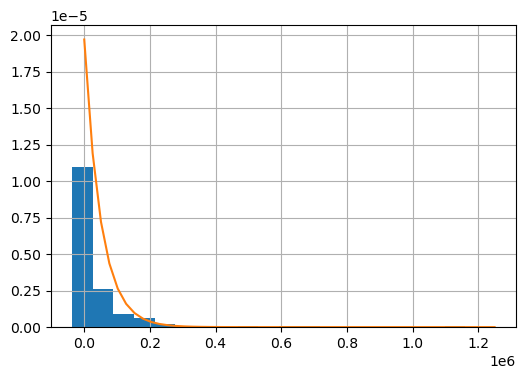

In [91]:
mpl.rcParams['figure.dpi'] = 100
emca.hist(bins=20, density=True)
plt.plot(np.linspace(0, 1_250_000), exponential_pdf(np.linspace(0, 1_250_000), emca_lambda))

### Excess mortality cumulative

#### Maximum likelihood method

In [92]:
emc_norm = (emc - emc.mean()) / emc.std()

emc_mean, emc_var = emc_norm.mean(), emc_norm.var()

display(Math(r'$E(X) = {}$'.format(emc_mean)))
display(Math(r'$Var(X) = {}$'.format(emc_var)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

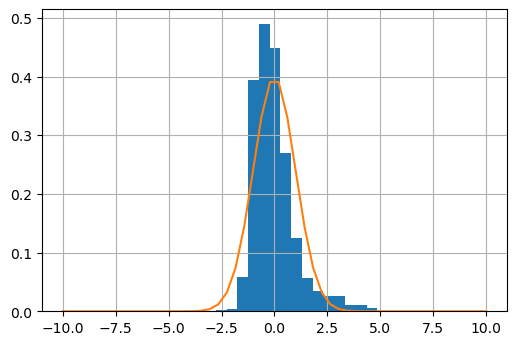

In [93]:
from scipy.stats.distributions import norm

mpl.rcParams['figure.dpi'] = 100
emc_norm.hist(bins=15, density=True)
plt.plot(np.linspace(-10, 10), norm.pdf(np.linspace(-10, 10), emc_mean, emc_var))

## Step 6. Validate your estimated parameters using QQ biplots

In [94]:
from math import sqrt

# Calculating confidence intervals for 25%, 50% and 75% quantiles
def conf_intervals(data, qn):
    # 95% quantile of Gaussian distribution
    norm_q95 = scipy.stats.norm.ppf(0.95)
    kernel = scipy.stats.gaussian_kde(data)

    p25 = len(data[data < qn[5]]) / len(data)
    sigma25 = \
        (sqrt((p25 * (1 - p25)) / len(data))) / kernel(qn[5])
    p50 = len(data[data < qn[10]]) / len(data)
    sigma50 = \
        (sqrt((p50 * (1 - p50)) / len(data))) / kernel(qn[10])
    p75 = len(data[data < qn[15]]) / len(data)
    sigma75 = \
        (sqrt((p75 * (1 - p75)) / len(data))) / kernel(qn[15])

    conf_q25 = norm_q95 * sigma25
    conf_q50 = norm_q95 * sigma50
    conf_q75 = norm_q95 * sigma75

    return [conf_q25, conf_q50, conf_q75]

def qq(data, theoretical):
    # Построение квантильного биплота для двух случайных величин
    plt.figure(figsize=(8, 8))

    percs = np.linspace(0, 100, 21)
    qn_first = np.percentile(data, percs)
    qn_second = np.percentile(theoretical, percs)

    min_qn = np.min([qn_first.min(), qn_second.min()])
    max_qn = np.max([qn_first.max(), qn_second.max()])
    x = np.linspace(min_qn, max_qn)

    plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
    plt.plot(x, x, color="k", ls="--")
    plt.xlabel('Data')
    plt.ylabel('Theoretical')
    plt.xlim([min_qn, max_qn])
    plt.ylim([min_qn, max_qn])
    plt.grid(True)
    
    conf_first = conf_intervals(data, qn_first)
    conf_second = conf_intervals(theoretical, qn_first)
    
    conf_first_list = []
    conf_second_list = []
    for element1, element2 in zip(conf_first, conf_second):
        conf_first_list.append(element1[0])
        conf_second_list.append(element2[0])

    # Добавление доверительных интервалов на график
    plt.errorbar(
        # [25%, 50%, 75%]
        [np.percentile(data, 25), np.percentile(data, 50), np.percentile(data, 75)],
        [np.percentile(theoretical, 25), np.percentile(theoretical, 50), np.percentile(theoretical, 75)],
        xerr=conf_first_list,
        yerr=conf_second_list,
        ls='none',
        capsize=3,
        elinewidth=2
    )

    plt.title('QQ-plot')
    plt.show()

### Hospital beds per thousand

#### Maximum likelihood method

In [95]:
beds_theoretical = gamma.rvs(beds_alpha, beds_beta, size=len(beds))

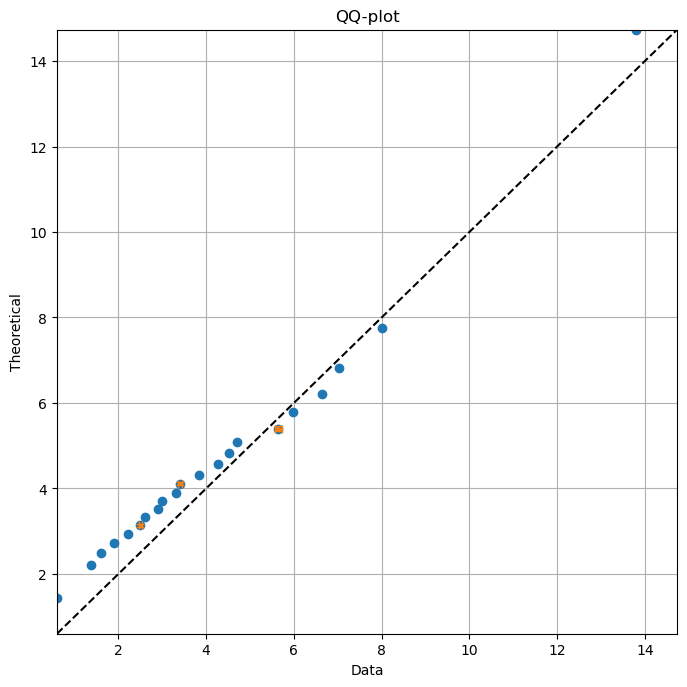

In [96]:
qq(beds, beds_theoretical)

### Excess mortality cumulative absolute

In [97]:
from math import log

def exponential_rvs(lam):
    return (-1 / lam) * log(1 - np.random.uniform())

In [98]:
emca_theoretical = [exponential_rvs(emca_lambda) for _ in range(len(emca))]

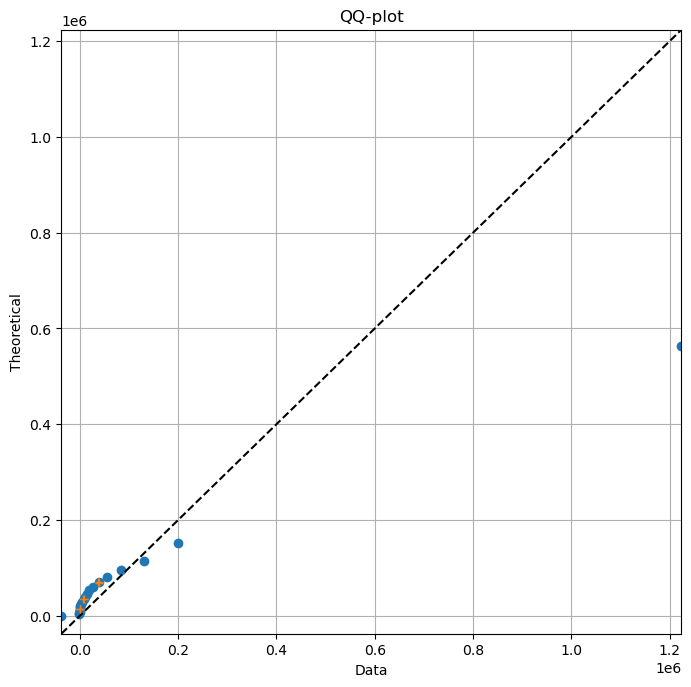

In [99]:
qq(emca, np.array(emca_theoretical))

### Excess mortality cumulative

In [100]:
emc_theoretical = norm.rvs(emc_mean, emc_var, size=len(emc))

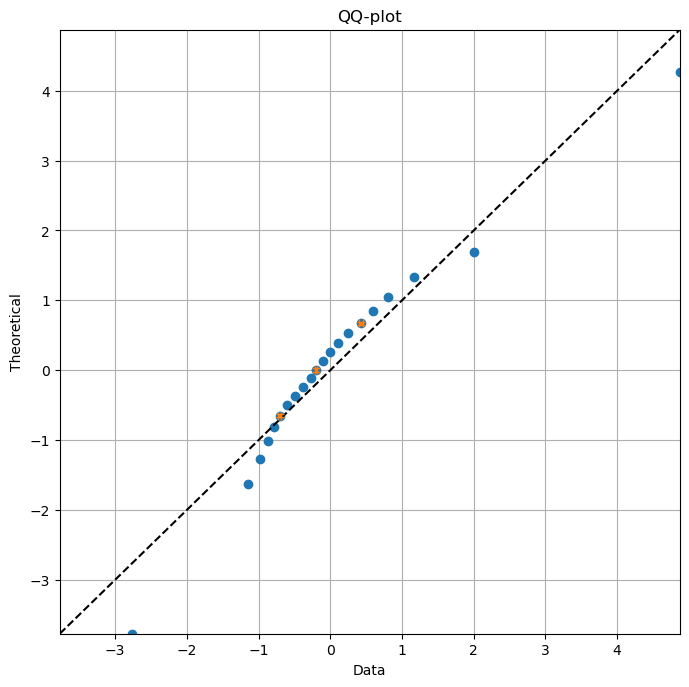

In [101]:
qq(emc, np.array(emc_theoretical))

## Step 7. Estimate correctness of fitted distributions using at least 2 statistical tests.